In [1]:
import pandas as pd
import numpy as np
import sqlite3

# Data Preparation and Exploration

In [2]:
data_home = './'

In [3]:
# get data from data file 
user_song_df = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

In [4]:
# check general info of dataframe
user_song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
user          object
song          object
play_count    int64
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


In [5]:
user_song_df.head(10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [6]:
# check play count for each user
user_play_count = pd.DataFrame(user_song_df.groupby('user')['play_count'].sum())

In [7]:
user_play_count=user_play_count.sort_values('play_count',ascending=False)

In [8]:
user_play_count.head(10)

,play_count
user,
093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
119b7c88d58d0c6eb051365c103da5caf817bea6,9884
3fa44653315697f42410a30cb766a4eb102080bb,8210
a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
d7d2d888ae04d16e994d6964214a1de81392ee04,6494
4ae01afa8f2430ea0704d502bc7b57fb52164882,6472
b7c24f770be6b802805ac0e2106624a517643c17,6150
113255a012b2affeab62607563d03fbdf31b08e7,5656
6d625c6557df84b60d90426c0116138b617b9449,5620


In [9]:
user_play_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019318 entries, 093cb74eb3c517c5179ae24caf0ebec51b24d2a2 to 284f12709cdfa78f089e7c384ad193772127c8c0
Data columns (total 1 columns):
play_count    1019318 non-null int64
dtypes: int64(1)
memory usage: 15.6+ MB


In [10]:
user_play_count.describe()

,play_count
count,1.019318e+06
mean,1.360520e+02
std,1.845255e+02
min,1.000000e+01
25%,3.400000e+01
50%,7.300000e+01
75%,1.630000e+02
max,1.313200e+04


In [11]:
# check play count for each song
song_play_count = pd.DataFrame(user_song_df.groupby('song')['play_count'].sum())

In [12]:
song_play_count = song_play_count.sort_values('play_count',ascending=False)

In [13]:
song_play_count.head(10)

,play_count
song,
SOBONKR12A58A7A7E0,726885
SOAUWYT12A81C206F1,648239
SOSXLTC12AF72A7F54,527893
SOFRQTD12A81C233C0,425463
SOEGIYH12A6D4FC0E3,389880
SOAXGDH12A8C13F8A1,356533
SONYKOW12AB01849C9,292642
SOPUCYA12A8C13A694,274627
SOUFTBI12AB0183F65,268353


In [14]:
song_play_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384546 entries, SOBONKR12A58A7A7E0 to SOJJMHG12A67ADD5DE
Data columns (total 1 columns):
play_count    384546 non-null int64
dtypes: int64(1)
memory usage: 5.9+ MB


In [15]:
song_play_count.describe()

,play_count
count,384546.000000
mean,360.633690
std,3256.809395
min,1.000000
25%,8.000000
50%,32.000000
75%,133.000000
max,726885.000000


In [16]:
user_play_count.head(100000)['play_count'].sum()/user_play_count['play_count'].sum()

0.408807280500655

In [17]:
song_play_count.head(30000)['play_count'].sum()/song_play_count['play_count'].sum()

0.7839315366645269

In [18]:
# songs are too many, only choose 30000 songs from the most listened songs
song_count_subset = song_play_count.head(30000)

In [19]:
# users are too many, only choose 100000 users from whom listened most songs
user_count_subset = user_play_count.head(n=100000)

In [20]:
#keep 100K users and 30k songs , delete others
subset = user_song_df[(user_song_df['user'].isin(user_count_subset.index))&(user_song_df['song'].isin(song_count_subset.index))]

In [21]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774800 entries, 498 to 48373494
Data columns (total 3 columns):
user          object
song          object
play_count    int64
dtypes: int64(1), object(2)
memory usage: 328.8+ MB


In [22]:
del(user_song_df)

In [23]:
subset.head(10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


In [24]:
# get song detailed information
conn = sqlite3.connect(data_home+'track_metadata.db')
cur = conn.cursor()

In [25]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')

In [26]:
metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_count_subset.index)]

In [27]:
metadata_df_sub.head(5)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
145,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
172,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
191,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


In [28]:
metadata_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30447 entries, 115 to 999988
Data columns (total 14 columns):
track_id              30447 non-null object
title                 30447 non-null object
song_id               30447 non-null object
release               30447 non-null object
artist_id             30447 non-null object
artist_mbid           30447 non-null object
artist_name           30447 non-null object
duration              30447 non-null float64
artist_familiarity    30447 non-null float64
artist_hotttnesss     30447 non-null float64
year                  30447 non-null int64
track_7digitalid      30447 non-null int64
shs_perf              30447 non-null int64
shs_work              30447 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 3.5+ MB


In [29]:
#remove useless info
metadata_df_sub = metadata_df_sub.drop('track_id',axis=1)
metadata_df_sub = metadata_df_sub.drop('artist_mbid',axis=1)

In [30]:
#remove duplicate rows
metadata_df_sub = metadata_df_sub.drop_duplicates('song_id')

In [31]:
data_merge = pd.merge(subset,metadata_df_sub,how='left',left_on='song',right_on='song_id')

In [32]:
data_merge.head(5)

,user,song,play_count,title,song_id,release,artist_id,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,SOADQPP12A67020C82,Tribute To Jake Hess,ARDFZE61187FB45994,Jake Hess,199.26159,0.374553,0.327544,2004,142275,-1,0
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,SOAFTRR12AF72A8D4D,Discovery,ARF8HTQ1187B9AE693,Daft Punk,223.60771,0.902841,1.021256,2007,485119,-1,0
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,SOANQFY12AB0183239,Uprising,ARR3ONV1187B9A2F59,Muse,304.84853,0.929030,0.750427,0,6024257,-1,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,SOAYATB12A6701FD50,Home,AR97V5X1187FB4AE98,Deep Blue Something,257.22730,0.655889,0.409729,1993,163047,-1,0
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),SOBOAFP12A8C131F36,We Sing. We Dance. We Steal Things.,ARML3X41187FB35F2E,Jason Mraz & Colbie Caillat,189.62240,0.842972,0.770117,0,2638597,-1,0


In [33]:
#remove useless features
del(data_merge['song_id'])
del(data_merge['artist_id'])
del(data_merge['duration'])
del(data_merge['artist_familiarity'])
del(data_merge['artist_hotttnesss'])
del(data_merge['track_7digitalid'])
del(data_merge['shs_perf'])
del(data_merge['shs_work'])

In [34]:
data_merge.head(5)

,user,song,play_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [35]:
data_merge.rename(columns={"play_count": "listen_count"},inplace=True)

In [36]:
data_merge.head(5)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [37]:
# check user listen count distribution
user_listen =data_merge.groupby('user')['title'].count().reset_index().sort_values(by='title',ascending = False)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
user_listen.head(5)

,user,title
54752,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1189
30556,4e73d9e058d2b1f2dba9c1fe4a8f416f9f58364f,1185
75369,c1255748c06ee3f6440c51c439446886c7807095,1149
6732,119b7c88d58d0c6eb051365c103da5caf817bea6,1120
58863,96f7b4f800cafef33eae71a6bc44f7139f63cd7a,1078


In [40]:
user_listen.describe()

,title
count,99996.000000
mean,107.752310
std,79.740528
min,1.000000
25%,53.000000
50%,89.000000
75%,141.000000
max,1189.000000


Text(0.5, 1.0, 'Histogram of User Play Count Distribution')

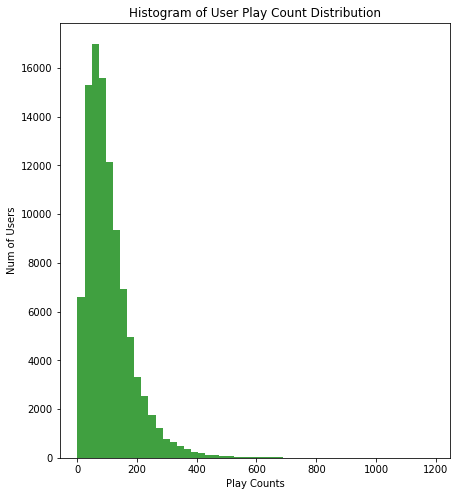

In [41]:
plt.figure(figsize=(7,8))
# plt.hist(user_listen['title'])
n, bins, patches = plt.hist(user_listen['title'], 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title('Histogram of User Play Count Distribution')

# Popularity-Based Recommendation

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_data, test_data = train_test_split(data_merge, test_size=0.4, random_state=0)

In [44]:
# recommend by popularity for new user who doesn't have listening record
def popularity_recommendation(data, user_id, item_id,recommend_num):
    # based on the item_id, get the popular items
    popular = data.groupby(item_id)[user_id].count().reset_index()
    # rename groupby column
    popular.rename(columns = {user_id:"score"},inplace = True)
    # sort the data
    popular = popular.sort_values('score',ascending=False)
    # create rank
    popular['rank'] = popular['score'].rank(ascending=0, method='first')
    return popular.set_index('rank').head(recommend_num)
    
    

In [45]:
# recommend songs
popularity_recommendation(train_data,'user','title',20)

,title,score
rank,,
1.0,Sehr kosmisch,11229
2.0,Dog Days Are Over (Radio Edit),10507
3.0,You're The One,9711
4.0,Secrets,9078
5.0,Revelry,8908
6.0,Undo,8819
7.0,Fireflies,7923
8.0,Hey_ Soul Sister,7826
9.0,Use Somebody,7674


In [46]:
# recommend releases
popularity_recommendation(train_data,'user','release',10)

,release,score
rank,,
1.0,Greatest Hits,44640
2.0,My Worlds,22296
3.0,Lungs,18578
4.0,Waking Up,16732
5.0,A Rush Of Blood To The Head,16182
6.0,Save Me_ San Francisco,15840
7.0,Only By The Night,15381
8.0,Vampire Weekend,15320
9.0,The Fame Monster,14967


In [47]:
# recommend artists
popularity_recommendation(train_data,'user','artist_name',20)

,artist_name,score
rank,,
1.0,Coldplay,75586
2.0,The Black Keys,57036
3.0,The Killers,44508
4.0,Jack Johnson,43654
5.0,Kings Of Leon,41826
6.0,Radiohead,41538
7.0,Daft Punk,38954
8.0,Muse,38586
9.0,Florence + The Machine,36601


# Item-based collabrative filtering Recommendation

In [142]:
#Item-based collabrative filtering
#Refer to https://github.com/llSourcell/recommender_live/blob/master/Song%20Recommender_Python.ipynb
class ItemCFRecommendation:
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        
    def set_data(self,train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id
        
    # get listened songs of a certain user
    def get_user_items(self,user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        return user_items
    
    # get users who listened to a certain song
    def get_item_users(self,item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = list(item_data[self.user_id].unique())
        return item_users
    
    # get all unique items from trainning data
    def get_all_items_training_data(self):
        all_items = list(self.train_data[self.item_id].unique())
        return all_items
    
    # construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_items, all_items):
        
        # get all the users which listened to the songs that the certain user listened to
        user_item_users = []
        for i in user_items:
            users = self.get_item_users(i)
            user_item_users.append(users)
        self.cooccurence_matrix = np.zeros((len(user_items),len(all_items)),float)
        print(self.cooccurence_matrix.shape)
        
        # calculate the similarity between user listened songs and all songs in the training data
        # using Jaccard similarity coefficient
        for i in range(0, len(user_items)):
            
            # get users of a certain listened song of a certain user
            user_listened_certain = set(user_item_users[i])
            
            for j in range(0, len(all_items)):
                user_unique = self.get_item_users(all_items[j])
                user_intersection = user_listened_certain.intersection(user_unique)
                if len(user_intersection)!=0:
                    user_union = user_listened_certain.union(user_unique)
                    self.cooccurence_matrix[i][j] = float(len(user_intersection)/len(user_union))
                else:
                    self.cooccurence_matrix[i][j] = 0
        return self.cooccurence_matrix
    
    # use cooccurence matrix to make top recommendation
    def generate_top_recommendation(self, user, all_songs, user_songs):
        print("Non Zero values in cooccurence %d" % np.count_nonzero(self.cooccurence_matrix))
        # get average similarity between all the listened songs and a certain song
        scores = self.cooccurence_matrix.sum(axis=0)/float(self.cooccurence_matrix.shape[0])
        print("score's shape: {n}".format(n=scores.shape))
        scores = scores.tolist()
        
        sort_index = sorted(((e,i) for (i,e) in enumerate(scores)),reverse=True)
        
        col = ['user_id', 'song', 'score', 'rank']
        df = pd.DataFrame(columns=col)
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
                
    
    def recommend(self, user):
        user_songs = self.get_user_items(user)  
        print("No. of unique songs for the user: %d" % len(user_songs))
        all_songs = self.get_all_items_training_data()        
        print("no. of unique songs in the training set: %d" % len(all_songs))
        self.construct_cooccurence_matrix(user_songs, all_songs)
        df_recommendations = self.generate_top_recommendation(user, all_songs, user_songs)
                
        return df_recommendations
        
        
        
        
    

In [152]:
data_merge.head(5)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [65]:
len(data_merge)

10774800

In [66]:
data_merge['song'].nunique()

30000

In [67]:
song_count_subset = song_count_subset.head(5000)

In [68]:
len(song_count_subset)

5000

In [69]:
song_count_subset.head(5)

,play_count
song,
SOBONKR12A58A7A7E0,726885
SOAUWYT12A81C206F1,648239
SOSXLTC12AF72A7F54,527893
SOFRQTD12A81C233C0,425463
SOEGIYH12A6D4FC0E3,389880


In [70]:
song_sub = song_count_subset.index

In [147]:
# data is too large to calculate, limit to 1000 songs
data_merge_sub = data_merge[data_merge['song'].isin(song_sub[:1000])]

In [148]:
len(data_merge_sub)

2558511

In [149]:
data_merge_sub['song'].nunique()

1000

In [150]:
data_merge_sub['user'].nunique()

99041

In [151]:
del(train_data)
del(test_data)

In [152]:
# data is too large to calculate, limit to 10000 users
data_merge_sub = data_merge_sub[data_merge_sub['user'].isin(user_count_subset.head(10000).index)] 

In [153]:
len(data_merge_sub)

390936

In [154]:
data_merge_sub['user'].nunique()

9948

In [155]:
data_merge_sub['song'].nunique()

1000

In [97]:
user_count_subset.head(5)

,play_count
user,
093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
119b7c88d58d0c6eb051365c103da5caf817bea6,9884
3fa44653315697f42410a30cb766a4eb102080bb,8210
a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
d7d2d888ae04d16e994d6964214a1de81392ee04,6494


In [156]:
train_data, test_data = train_test_split(data_merge_sub,test_size=0.3, random_state=0)

In [157]:
model = ItemCFRecommendation()

In [158]:
model.set_data(train_data,'user','title')

In [159]:
# get a specific user 
user = train_data['user'].iloc[7]

In [160]:
# recommend songs for this user
model.recommend(user)

No. of unique songs for the user: 115
no. of unique songs in the training set: 997
(115, 997)
Non Zero values in cooccurence 113158
score's shape: (997,)


,user_id,song,score,rank
0,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Billionaire [feat. Bruno Mars] (Explicit Albu...,0.138358,1
1,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Lucky (Album Version),0.137466,2
2,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,If I Had You,0.137242,3
3,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Heartbreak Warfare,0.134886,4
4,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Breakeven,0.132289,5
5,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Mockingbird,0.131983,6
6,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Here Without You,0.131405,7
7,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Fireflies,0.130526,8
8,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Secrets,0.130332,9
9,b704e88f1f132b4e21d11c6f44eee73d2eb1cc43,Nothin' On You [feat. Bruno Mars] (Album Version),0.129880,10
